In [17]:
# 获取所有的数据
# 不做标题,脚注,引用处理
from sklearn.datasets import fetch_20newsgroups
newsgroups_all = fetch_20newsgroups(subset='all')

all_data = newsgroups_all.data
# 查看数据集和数据量
print("数据量:\n",len(all_data))
print("数据集:\n",all_data[1])

数据量:
 18846
数据集:
 From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   



In [18]:
# 去除符号，处理大小写问题
import re
def clear_data(data):
    res = re.sub('[\W]+', ' ', data.lower())
    return res.strip()
all_data=list(map(clear_data,all_data))
# 查看数据集和数据量
print("数据量:\n",len(all_data))
print("数据集:\n",all_data[1])

数据量:
 18846
数据集:
 from mblawson midway ecn uoknor edu matthew b lawson subject which high performance vlb video card summary seek recommendations for vlb video card nntp posting host midway ecn uoknor edu organization engineering computer network university of oklahoma norman ok usa keywords orchid stealth vlb lines 21 my brother is in the market for a high performance video card that supports vesa local bus with 1 2mb ram does anyone have suggestions ideas on diamond stealth pro local bus orchid farenheit 1280 ati graphics ultra pro any other high performance vlb card please post or email thank you matt matthew b lawson mblawson essex ecn uoknor edu now i nebuchadnezzar praise and exalt and glorify the king of heaven because everything he does is right and all his ways are just nebuchadnezzar king of babylon 562 b c


标签名:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Text(0.5,1,'All Data Distribution')

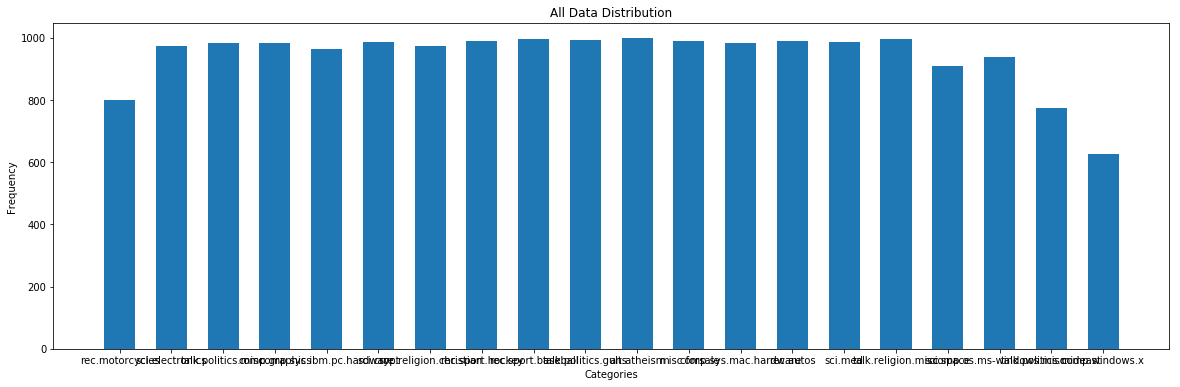

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
labels = newsgroups_all.target
label_names = newsgroups_all.target_names
# 查看标签名
print("标签名:\n",label_names)
# 查看数据的分布情况
label_des = Counter(labels)
plt.figure(figsize=(20,6))
plt.bar(list(label_des.keys()), list(label_des.values()), tick_label = label_names,width = 0.6)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('All Data Distribution')

In [20]:
# 统计词频和文章长度
total_word = Counter()
d_length = []
def count_doc(data):
    for d in data:
        # 处理后，获取这篇文档的所有单词数
        d_length.append(len(d.split()))
        for word in d.split():
            # 统计每个单词出现的次数
            total_word[word] += 1
    return d_length, total_word

d_length, total_word = count_doc(all_data)
print(total_word.most_common(10))

[('the', 240794), ('to', 124248), ('of', 114080), ('a', 105456), ('and', 95818), ('i', 87457), ('in', 81519), ('is', 70316), ('that', 65129), ('ax', 62416)]


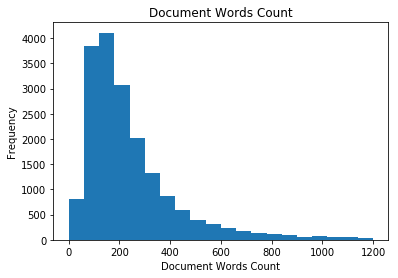

In [21]:
# 文档词数分布情况
plt.hist(d_length, range=(0,1200),bins=20)  
plt.xlabel('Document Words Count')
plt.ylabel('Frequency')
plt.title('Document Words Count')
plt.show()

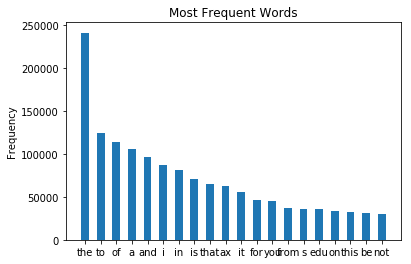

In [22]:
# 文档长度分布
x_val = [i[0] for i in total_word.most_common(20)]
y_val = [i[1] for i in total_word.most_common(20)]
plt.bar(x=range(20),height=y_val,width=0.5)
plt.xticks(range(20),x_val)
plt.title('Most Frequent Words')
plt.ylabel('Frequency')
plt.show()

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# 保留词频小于等于20000个单词
MAX_NB_WORDS = 20000 
# 每篇文档限定1000词以内
MAX_SEQUENCE_LENGTH = 1000 

# 构建分词器
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
# 将所有数据放到分词器里边
tokenizer.fit_on_texts(all_data)
# 文本转化为数字序列
sequences = tokenizer.texts_to_sequences(all_data)
# 构建词汇表
word_index = tokenizer.word_index 

# 按照最大文本长度截断文本
features = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
# 查看数字序列和词汇表
# print("数字序列:\n",sequences[:2])
# print("词汇表:\n",len(word_index))

In [24]:
# 对标签进行独热编码
from keras.utils import to_categorical
labels = to_categorical(labels)
print("经独热编码之后的标签:",labels[:2])

经独热编码之后的标签: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
# 将数据拆分成训练集,验证集,测试集
from sklearn.model_selection import train_test_split
# 测试集占据0.2
x_tv, x_test, y_tv, y_test = train_test_split(features, labels, test_size=0.2) 
# 验证集占据训练集中的0.2
x_train, x_val, y_train, y_val = train_test_split(x_tv, y_tv, test_size=0.2) 
print("x的维度:\n",x_train.shape, x_val.shape, x_test.shape)
print("y的维度:\n",y_train.shape, y_val.shape, y_test.shape)

x的维度:
 (12060, 1000) (3016, 1000) (3770, 1000)
y的维度:
 (12060, 20) (3016, 20) (3770, 20)


In [26]:
# 从GloVe文件中解析出每个词和它所对应的词向量，并用字典的方式存储
import numpy as np
embeddings_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as txtfile:
    lines = txtfile.readlines()
    for line in lines:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("embeddings_index len:\n",len(embeddings_index))
print("embeddings_index val:\n",embeddings_index['the'])

embeddings_index len:
 400000
embeddings_index val:
 [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.725

In [28]:
# 构建词向量矩阵, 没有的单词的词向量均为0
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

# 统计零值
count_zero = 0
for word, idx in word_index.items():
    embed_vector = embeddings_index.get(word)
    if embed_vector is not None:
        count_zero += 1
        embedding_matrix[idx] = embed_vector
        
print("embedding_matrix val:\n",embedding_matrix)
prop = count_zero * 1.0 / embedding_matrix.shape[0]
print("零值比列：\n",1 - prop)

embedding_matrix val:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.18970001  0.050024    0.19084001 ... -0.39804     0.47646999
  -0.15983   ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
零值比列：
 0.5953664240855722


In [29]:
# 词向量加载到embedding层中
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

# 构建CNN模型

In [30]:
import keras
from keras.layers import Dense,Input
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Flatten, Dropout
from keras.models import Model
tb = [keras.callbacks.TensorBoard(log_dir='./logs')]

In [31]:
# （Conv1D-MaxPooling1D）* 3 - Flatten - Dropout - Dense * 2
main_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float64')
# 使用已训练完成的词向量
embedding_layer = Embedding(len(word_index) + 1, embedding_dim,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embed = embedding_layer(main_input)
# 使用3层卷积池化
x = Conv1D(128, 5, activation='relu')(embed)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)
x = Flatten()(x)
x = Dropout(0.2)(x) # 丢弃20%
x = Dense(128, activation='relu')(x)
preds = Dense(20, activation='softmax')(x)
model = Model(inputs=main_input, outputs=preds)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary()) # 查看模型概况

# history_cnn记录训练结果
history_cnn = model.fit(x_train, y_train, batch_size=128, epochs=25, callbacks=tb, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 1000, 100)         16846600  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 35, 128)           82048     
__________

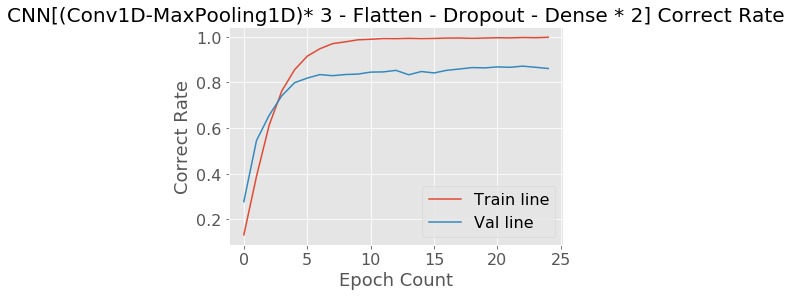

In [32]:
# 绘制模型的训练和验证曲线
plt.style.use('ggplot')

plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc']) 

plt.legend(['Train line', 'Val line'], loc='lower right', fontsize=16)

plt.title('CNN[(Conv1D-MaxPooling1D)* 3 - Flatten - Dropout - Dense * 2] Correct Rate', fontsize=20)
plt.xlabel('Epoch Count', fontsize=18)
plt.ylabel('Correct Rate', fontsize=18)

plt.xticks(range(0, 26, 5), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [33]:
# 模型测试 评估
score, acc = model.evaluate(x_test, y_test, batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

3770/3770 [==============================] - 16s 4ms/step
Test score: 0.7753802068195546
Test accuracy: 0.8769230766701129


In [34]:
# (Conv1D-MaxPooling1D-Dropout)* 2-Conv1D-MaxPooling1D-Dropout-Dense-Dropout-Dense
main_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float64')
# 使用已训练完成的词向量
embedding_layer = Embedding(len(word_index) + 1, embedding_dim,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embed = embedding_layer(main_input)
# 使用3层卷积池化,每层之间使用Dropout来防止过拟合
x = Conv1D(128, 5, activation='relu')(embed)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(20, activation='softmax')(x)
model = Model(inputs=main_input, outputs=preds)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary()) # 查看模型概况

# history_cnn记录训练结果
history_cnn = model.fit(x_train, y_train, batch_size=128, epochs=25, callbacks=tb, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 1000, 100)         16846600  
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 199, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 39, 128)           0         
__________

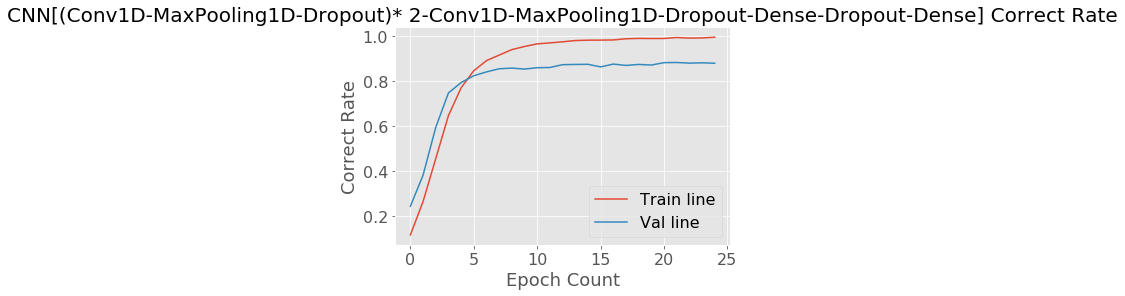

In [35]:
# 绘制模型的训练和验证曲线
plt.style.use('ggplot')

plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc']) 

plt.legend(['Train line', 'Val line'], loc='lower right', fontsize=16)

plt.title('CNN[(Conv1D-MaxPooling1D-Dropout)* 2-Conv1D-MaxPooling1D-Dropout-Dense-Dropout-Dense] Correct Rate', fontsize=20)
plt.xlabel('Epoch Count', fontsize=18)
plt.ylabel('Correct Rate', fontsize=18)

plt.xticks(range(0, 26, 5), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [36]:
# 模型测试 评估
score, acc = model.evaluate(x_test, y_test, batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

3770/3770 [==============================] - 14s 4ms/step
Test score: 0.7242819279511348
Test accuracy: 0.8843501329738203


In [37]:
# 模型结构：LSTM-Dense
from keras.models import Sequential
from keras.layers import LSTM,Activation
from keras import regularizers

model = Sequential()
model.add(Embedding(len(word_index) + 1,embedding_dim, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH, trainable=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax', kernel_regularizer=regularizers.l2(0.01), 
                activity_regularizer=regularizers.l1(0.001)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
history_rnn = model.fit(x_train, y_train, batch_size=128, epochs=60, callbacks=tb, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 100)         16846600  
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2020      
Total params: 16,929,020
Trainable params: 16,929,020
Non-trainable params: 0
_________________________________________________________________
None
Train on 12060 samples, validate on 3016 samples
Epoch 1/60
12060/12060 [==============================] - 265s 22ms/step - loss: 3.1980 - acc: 0.1274 - val_loss: 2.8544 - val_acc: 0.1940
Epoch 2/60
12060/12060 [==============================] - 260s 22ms/step - loss: 2.7549 - acc: 0.2108 - val_loss: 2.5377 - val_acc: 0.2304
Epoch 3/60
12060/12060 [==============================] - 257s

Epoch 54/60
12060/12060 [==============================] - 261s 22ms/step - loss: 0.3622 - acc: 0.9910 - val_loss: 0.7324 - val_acc: 0.8916
Epoch 55/60
12060/12060 [==============================] - 260s 22ms/step - loss: 0.3646 - acc: 0.9893 - val_loss: 0.7276 - val_acc: 0.8916
Epoch 56/60
12060/12060 [==============================] - 263s 22ms/step - loss: 0.3606 - acc: 0.9906 - val_loss: 0.7315 - val_acc: 0.8903
Epoch 57/60
12060/12060 [==============================] - 259s 21ms/step - loss: 0.3515 - acc: 0.9925 - val_loss: 0.7266 - val_acc: 0.8922
Epoch 58/60
12060/12060 [==============================] - 262s 22ms/step - loss: 0.3498 - acc: 0.9930 - val_loss: 0.7379 - val_acc: 0.8879
Epoch 59/60
12060/12060 [==============================] - 260s 22ms/step - loss: 0.3475 - acc: 0.9933 - val_loss: 0.7551 - val_acc: 0.8826
Epoch 60/60
12060/12060 [==============================] - 262s 22ms/step - loss: 0.3550 - acc: 0.9903 - val_loss: 0.7394 - val_acc: 0.8893


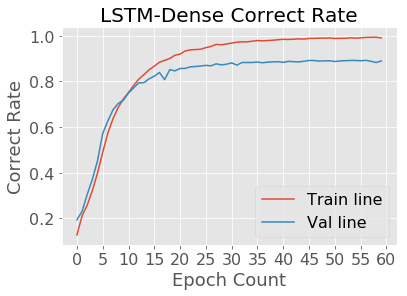

In [38]:
# 绘制训练和验证曲线
plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])

plt.legend(['Train line', 'Val line'], loc='lower right', fontsize=16)

plt.title('LSTM-Dense Correct Rate', fontsize=20)
plt.xlabel('Epoch Count', fontsize=18)
plt.ylabel('Correct Rate', fontsize=18)

plt.xticks(range(0, 61, 5), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [39]:
# 模型测试 评估
score, acc = model.evaluate(x_test, y_test, batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

3770/3770 [==============================] - 27s 7ms/step
Test score: 0.699656054575184
Test accuracy: 0.8949602119486275


In [40]:
# 模型结构：CNN-LSTM
from keras.layers.core import *
model = Sequential()
model.add(Embedding(len(word_index) + 1,embedding_dim, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(activation="relu", padding="same", filters=128, kernel_size=5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax',kernel_regularizer=regularizers.l2(0.01), 
                activity_regularizer=regularizers.l1(0.001)))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
history_rnn = model.fit(x_train, y_train, batch_size=128, epochs=60,
                        validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 100)         16846600  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1000, 100)         0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1000, 128)         64128     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 250, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2020      
Total params: 17,004,348
Trainable params: 17,004,348
Non-trainable params: 0
________________________________________________________________

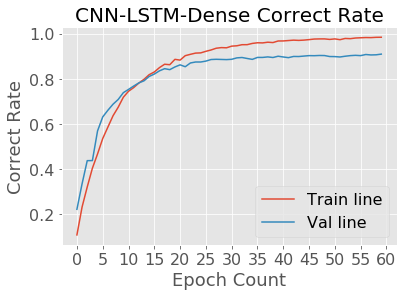

In [41]:
# 绘制训练和验证曲线
plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])

plt.legend(['Train line', 'Val line'], loc='lower right', fontsize=16)

plt.title('CNN-LSTM-Dense Correct Rate', fontsize=20)
plt.xlabel('Epoch Count', fontsize=18)
plt.ylabel('Correct Rate', fontsize=18)

plt.xticks(range(0, 61, 5), fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [42]:
# 模型测试 评估
score, acc = model.evaluate(x_test, y_test, batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

3770/3770 [==============================] - 15s 4ms/step
Test score: 0.5894066171083273
Test accuracy: 0.9177718833207452
